<a href="https://colab.research.google.com/github/ttury/Linear_Regression_For_Solar_Power/blob/main/Weather_To_Solar_Power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

weather_2019 = pd.read_csv('jindo_weather_2019.csv')
sun_2019 = pd.read_csv('jindo_sun_2019.csv')


weather_datas = weather_2019.values[:, 8].astype(np.float)
sun_datas = sun_2019.values[:, 28].astype(np.float) / 1000000.0

In [68]:
class Neuron:

  def __init__(self):
    self.w = 1
    self.b = 1

  def forpass(self, x_data):
    y_hat = self.w * x_data + self.b
    return y_hat
  
  def backprop(self, x_data, err):
    w_gradiant = x_data * err
    b_gradiant = 1 * err
    return w_gradiant, b_gradiant
  
  def fit(self, x_datas, y_datas, epochs = 1):
    for _ in range(epochs):
      for x_data, y_data in zip(x_datas, y_datas):
        y_hat = self.forpass(x_data)
        err = (y_data - y_hat) # edited from book
        w_gradiant, b_gradiant = self.backprop(x_data, err)
        self.w += 0.01 * w_gradiant
        self.b += 0.01 * b_gradiant

neuron = Neuron()

neuron.fit(weather_datas, sun_datas)
print(neuron.w)

0.34122211561544324


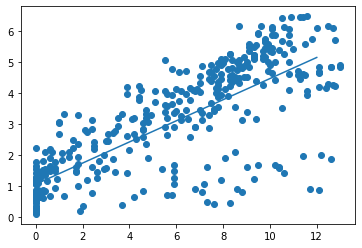

In [70]:
plt.scatter(weather_datas, sun_datas)
pos_1 = [0.0, neuron.w * 0 + neuron.b]
pos_2 = [12.0, neuron.w * 12 + neuron.b]
plt.plot([pos_1[0], pos_2[0]], [pos_1[1], pos_2[1]])
plt.show()